In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_datareader as data
import pandas_datareader as data
from datetime import date

In [9]:
start = '2010-01-01'
end = date.today()

df = data.DataReader('TSLA','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [10]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-11,1008.469971,974.640015,980.400024,975.929993,19785700.0,975.929993
2022-04-12,1021.190002,976.599976,997.640015,986.950012,21992000.0,986.950012
2022-04-13,1026.239990,973.099976,981.080017,1022.369995,18373700.0,1022.369995
2022-04-14,1012.710022,982.190002,999.289978,985.000000,19444000.0,985.000000
2022-04-18,1014.919983,973.409973,989.030029,1004.289978,17182300.0,1004.289978


In [11]:
df = df.reset_index()

In [12]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [13]:
df= df.drop(["Date", "Adj Close"], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,5.000,3.508,3.800,4.778,93831500.0
1,6.084,4.660,5.158,4.766,85935500.0
2,5.184,4.054,5.000,4.392,41094000.0
3,4.620,3.742,4.600,3.840,25699000.0
4,4.000,3.166,4.000,3.222,34334500.0


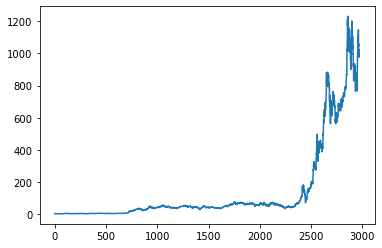

In [14]:
plt.plot(df.Close)

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2967    978.422495
2968    977.401895
2969    976.661795
2970    975.141194
2971    973.615394
Name: Close, Length: 2972, dtype: float64

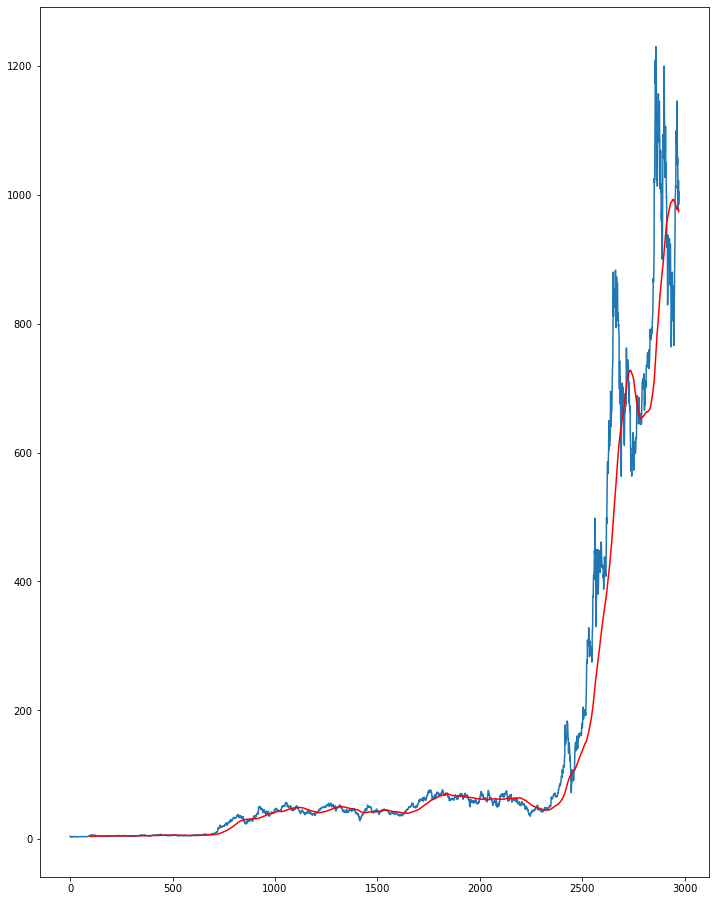

In [17]:
plt.figure(figsize = (12,16))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2967    884.964146
2968    886.455296
2969    888.163346
2970    889.689846
2971    891.321696
Name: Close, Length: 2972, dtype: float64

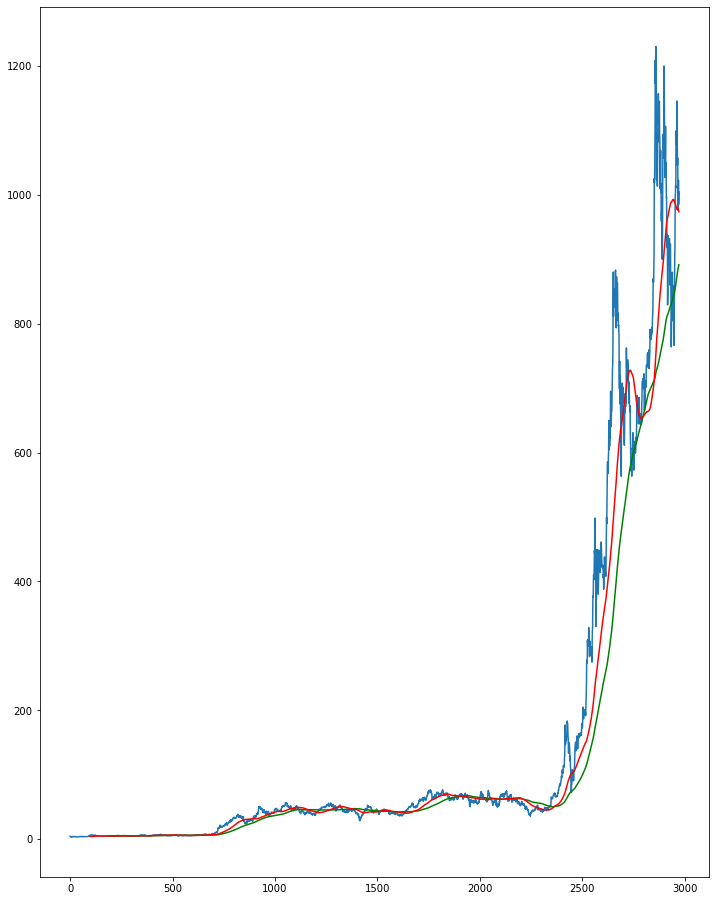

In [21]:
plt.figure(figsize = (12,16))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [23]:
df.shape

(2972, 5)

In [24]:
# Splitting data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2080, 1)
(892, 1)


In [25]:
data_training.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [26]:
data_testing.head()

,Close
2080,60.203999
2081,58.959999
2082,56.366001
2083,52.389999
2084,50.112000


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))



In [28]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191224],
       [0.02174973],
       [0.01668473],
       ...,
       [0.79014087],
       [0.67434993],
       [0.79875405]])

In [31]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
# ML Model



In [36]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

 

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
          
model.add(Dense(units = 1))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [40]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
62/62 [==============================] - 24s 290ms/step - loss: 0.0675
Epoch 2/50
62/62 [==============================] - 17s 269ms/step - loss: 0.0109
Epoch 3/50
62/62 [==============================] - 17s 269ms/step - loss: 0.0093
Epoch 4/50
62/62 [==============================] - 17s 269ms/step - loss: 0.0098
Epoch 5/50
62/62 [==============================] - 17s 269ms/step - loss: 0.0097
Epoch 6/50
62/62 [==============================] - 17s 267ms/step - loss: 0.0077
Epoch 7/50
62/62 [==============================] - 16s 259ms/step - loss: 0.0078
Epoch 8/50
62/62 [==============================] - 14s 224ms/step - loss: 0.0078
Epoch 9/50
62/62 [==============================] - 13s 215ms/step - loss: 0.0079
Epoch 10/50
62/62 [==============================] - 16s 256ms/step - loss: 0.0070
Epoch 11/50
62/62 [==============================] - 17s 270ms/step - loss: 0.0067
Epoch 12/50
62/62 [==============================] - 17s 270ms/step - loss: 0.0064
Epoch 13/50
6

In [41]:
model.save('keras_model.h5')

In [42]:
data_testing.head()

,Close
2080,60.203999
2081,58.959999
2082,56.366001
2083,52.389999
2084,50.112000


In [43]:
past_100_days = data_training.tail(100)

In [45]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [47]:
final_df.head()

,Close
0,61.004002
1,60.212002
2,58.394001
3,56.835999
4,57.296001


In [48]:
input_data = scaler.fit_transform(final_df)

In [49]:
input_data

array([[0.02111185],
       [0.0204486 ],
       [0.01892614],
       [0.0176214 ],
       [0.01800663],
       [0.0176817 ],
       [0.01638869],
       [0.01767332],
       [0.01608554],
       [0.01676554],
       [0.01656121],
       [0.01672869],
       [0.01755106],
       [0.01888426],
       [0.01771352],
       [0.01890101],
       [0.01972505],
       [0.01878545],
       [0.02353708],
       [0.02296594],
       [0.0232289 ],
       [0.02564742],
       [0.02743452],
       [0.02777117],
       [0.02993846],
       [0.03001384],
       [0.03213423],
       [0.02907255],
       [0.03069216],
       [0.02822841],
       [0.02590368],
       [0.02579984],
       [0.02730556],
       [0.02772428],
       [0.02863373],
       [0.02746467],
       [0.02614486],
       [0.02208998],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403452],
       [0.02344663],
       [0.02306979],
       [0.02343156],
       [0.02196269],
       [0.02407137],
       [0.024

In [50]:
input_data.shape


(992, 1)

In [51]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [53]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(892, 100, 1)
(892,)


In [55]:
# Making Predictions

y_predicted = model.predict(x_test)

In [56]:
y_predicted.shape

(892, 1)

In [57]:
y_test

array([0.0204419 , 0.01940013, 0.01722781, 0.01389815, 0.01199046,
       0.01404051, 0.01304898, 0.01227016, 0.01336721, 0.01350288,
       0.01635017, 0.01554455, 0.01422643, 0.01357155, 0.01373066,
       0.01928958, 0.01834495, 0.02275993, 0.02544644, 0.02610802,
       0.02527895, 0.02652171, 0.02768743, 0.02804417, 0.02720506,
       0.02714811, 0.02833728, 0.02887994, 0.02873088, 0.02551008,
       0.02675787, 0.02764053, 0.02838418, 0.02936733, 0.02922664,
       0.02822506, 0.02666743, 0.02459728, 0.0279755 , 0.02762713,
       0.02828871, 0.02716654, 0.02872585, 0.03006743, 0.03027009,
       0.03083285, 0.02998034, 0.0311829 , 0.03145255, 0.03142576,
       0.03313246, 0.03127669, 0.02838083, 0.02647314, 0.02579314,
       0.02284703, 0.0235823 , 0.01949894, 0.02464082, 0.02297264,
       0.02594388, 0.02576466, 0.02196604, 0.02033136, 0.02323392,
       0.02612644, 0.02619176, 0.02672437, 0.027803  , 0.02818654,
       0.02603264, 0.02771255, 0.02798388, 0.02819491, 0.02064

In [58]:
print(y_predicted)

[[0.04959768]
 [0.04971397]
 [0.04983175]
 [0.04994431]
 [0.05004263]
 [0.05011463]
 [0.05014819]
 [0.05013773]
 [0.0500803 ]
 [0.04997623]
 [0.04983112]
 [0.04965311]
 [0.04945606]
 [0.04925269]
 [0.04905352]
 [0.0488663 ]
 [0.04869598]
 [0.04855436]
 [0.04844809]
 [0.04838854]
 [0.04838797]
 [0.04845661]
 [0.04859886]
 [0.04881632]
 [0.04910722]
 [0.04946518]
 [0.04987812]
 [0.05033046]
 [0.05080622]
 [0.05128875]
 [0.05176046]
 [0.05220142]
 [0.05259657]
 [0.05293572]
 [0.05321431]
 [0.05343303]
 [0.05359519]
 [0.05370468]
 [0.05376422]
 [0.05377677]
 [0.05375013]
 [0.05369258]
 [0.05361313]
 [0.05351973]
 [0.0534218 ]
 [0.05332923]
 [0.05325079]
 [0.05319375]
 [0.0531624 ]
 [0.05316025]
 [0.05318874]
 [0.05324805]
 [0.0533376 ]
 [0.0534516 ]
 [0.05357856]
 [0.0537039 ]
 [0.05381155]
 [0.05388463]
 [0.05390909]
 [0.05387321]
 [0.05377662]
 [0.05362323]
 [0.05342489]
 [0.05319434]
 [0.05294052]
 [0.05267125]
 [0.05239818]
 [0.05213559]
 [0.05189618]
 [0.05169147]
 [0.05153143]
 [0.05

In [59]:
scaler.scale_

array([0.00083744])

In [60]:
scale_factor = 1/0.00083744
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

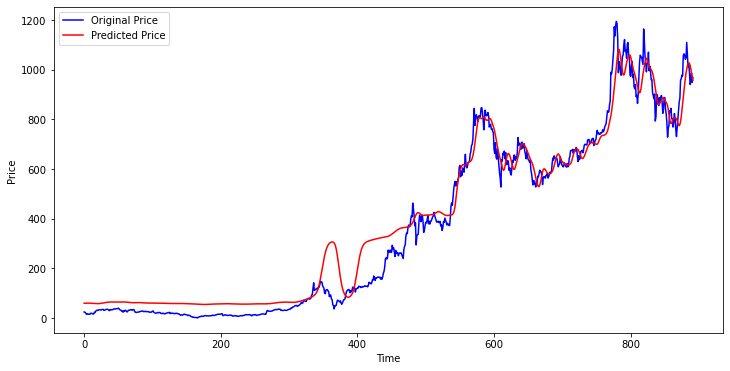

In [65]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()